# Lab experiment
### You are a scientist who is working at Copenhagen University. Your research project is about identifying gases that reduce the global warming potential of greenhouse gases. In your most recent experiment you mixed two different gases. The chemical reaction made the temperature in the reaction tube vary over time, which was measured with 3 different thermometers. You're now back in your office and ready to analyse your data, which is available in a csv file

### The exercise might seem like a lot, but don't worry. Most of the visualisation questions were already solved during the exercises session or you can find help in the lecture notebook. If you don't understand some questions or need help, please ask for help in the Slack channel or ping one of the teachers directly.

### Hint: it might be a good idea to label each figure according to the equastions that you're solving. For example, a reasonable name for the figure in question c) could be figc. 

#### a) Import the dataset into a pandas DataFrame. Convert the time column into a pandas.Timestamp object. 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data/temperature_signals.csv") 
df.head()

,time,temp1,temp2,temp3
0,2021-05-04 17:10:01,10.9934,NaN,13.6496
1,2021-05-04 17:10:02,10.7878,NaN,14.7106
2,2021-05-04 17:10:03,10.2174,12.0238,13.4136
3,2021-05-04 17:10:04,11.6362,12.9300,14.3805
4,2021-05-04 17:10:05,10.7618,13.7138,11.2065


In [22]:
df["time"]=pd.to_datetime(df["time"], format="%Y-%m-%d %H:%M:%S")
type(df.loc[0,"time"])

pandas._libs.tslibs.timestamps.Timestamp

#### b) Inspect the dataset. Are there any missing values? If yes, how many are missing? Can you say anything more about the missing values?

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1000 non-null   datetime64[ns]
 1   temp1   950 non-null    float64       
 2   temp2   944 non-null    float64       
 3   temp3   849 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 31.4 KB


In [26]:
df.isnull().sum()

time       0
temp1     50
temp2     56
temp3    151
dtype: int64

In [27]:
df = df.dropna()
print(df)

                   time    temp1    temp2    temp3
2   2021-05-04 17:10:03  10.2174  12.0238  13.4136
3   2021-05-04 17:10:04  11.6362  12.9300  14.3805
4   2021-05-04 17:10:05  10.7618  13.7138  11.2065
5   2021-05-04 17:10:06  10.3126  13.1576  15.4167
6   2021-05-04 17:10:07  10.5923  11.1754  14.9882
..                  ...      ...      ...      ...
991 2021-05-04 17:26:32   9.9647  14.2421  16.1723
992 2021-05-04 17:26:33  11.2768  14.3997  15.1188
994 2021-05-04 17:26:35  11.2160  15.1647  13.0820
996 2021-05-04 17:26:37  13.3439  16.1486  15.5092
999 2021-05-04 17:26:40  12.8530  15.2382  14.6891

[767 rows x 4 columns]


In [28]:
df= df.reset_index(drop=True)

In [29]:
df.head()

,time,temp1,temp2,temp3
0,2021-05-04 17:10:03,10.2174,12.0238,13.4136
1,2021-05-04 17:10:04,11.6362,12.9300,14.3805
2,2021-05-04 17:10:05,10.7618,13.7138,11.2065
3,2021-05-04 17:10:06,10.3126,13.1576,15.4167
4,2021-05-04 17:10:07,10.5923,11.1754,14.9882


#### c) Now visualise each of the 3 temperature signals.
- First, you want to create a figure with 3 different axes instances, one axis instance for each temperature signal
- Then you visualize each signal. Do you use a scatter or line plot? Try to justify your choice with a couple of words
- Because you want to discuss your experiment with your colleagues, you also want to make the figure pretty. Label each of the axes with information that you consider important

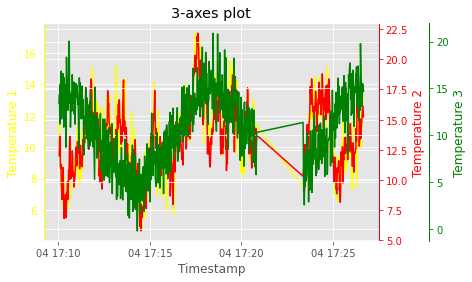

In [30]:
fig, ax1 = plt.subplots()
ax1.plot(df["time"], df["temp1"],color="yellow")
ax2 = ax1.twinx()

ax2.plot(df["time"],df["temp2"],color="red")

ax3= ax1.twinx()
ax3.plot(df["time"],df["temp3"],color="green")

ax3.spines['right'].set_position(('axes',1.15))

ax1.set_ylabel("Temperature 1", color= "yellow")
ax2.set_ylabel("Temperature 2", color= "red")
ax3.set_ylabel("Temperature 3", color= "green")

ax1.tick_params(axis='y',colors='yellow')
ax2.tick_params(axis='y',colors='red')
ax3.tick_params(axis='y',colors='green')

ax2.spines['right'].set_color('red')
ax3.spines['right'].set_color('green')
ax3.spines['left'].set_color('yellow')

ax1.set_xlabel("Timestamp")
ax1.set_title("3-axes plot")

plt.show()

fig.savefig("3-axes",bbox_inches='tight')

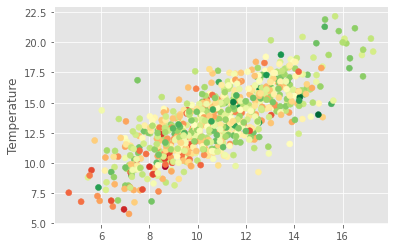

In [31]:
plt.style.use("ggplot")

fig, ax = plt.subplots()
ax.scatter(x=df["temp1"], y=df["temp2"], c=df["temp3"], cmap="RdYlGn")
ax.set_ylabel("Temperature")

plt.show()

#### d) Explain in your own words how the data looks like. Don't be too specific, try to "explain" the big picture in 2-3 sentences. HINT: don't focus only on the missing data

#### e) Now create one figure with one axis element to visualise the temperature of signal 1 and 2 in one coordinate system. Don't forget to label your x- and y-axis

In [32]:
def plot_scatter_with_diagonal(df, x_col, y_col):
    fig, ax = plt.subplots()
    ax.scatter(df[x_col], df[y_col])
    ax.set_title("Scatter plot")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    _min = min(ax.get_xlim() + ax.get_ylim())
    _max = max(ax.get_xlim() + ax.get_ylim())
    ax.set_xlim([_min, _max])
    ax.set_ylim([_min, _max])
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, c="red")
    ax.grid(which="both")
    
    return fig, ax

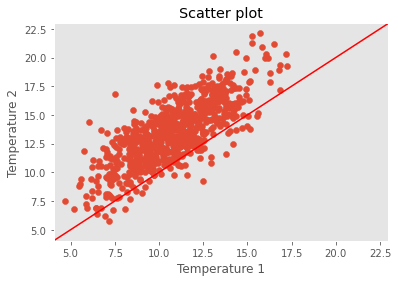

In [33]:
fig, ax = plot_scatter_with_diagonal(df=df, x_col="temp1", y_col="temp2")
ax.set_xlabel("Temperature 1")
ax.set_ylabel("Temperature 2")
plt.show()

#### f) Describe in 1-2 sentences what you now see 

#### g) Create another figure to use a scatter plot to visualize temperature signal 1 and 2

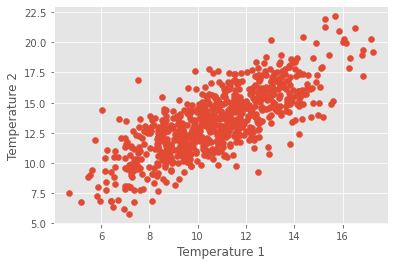

In [34]:
plt.style.use("ggplot")

fig, ax = plt.subplots()
ax.scatter(x=df["temp1"], y=df["temp2"])
ax.set_xlabel("Temperature 1")
ax.set_ylabel("Temperature 2")

plt.show()

#### h) There seems to be a pattern. Try to describe it in 1-2 sentences

In [ ]:
#I can see diagonal here

#### i) What do you see if you plot the temperature of signal 1 against the temperature of signal 3. Use again a scatter plot and try to describe what you see

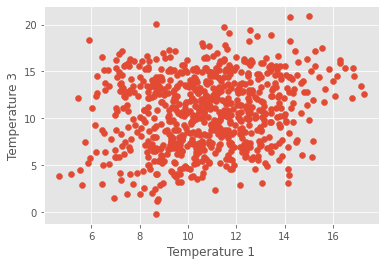

In [35]:
plt.style.use("ggplot")

fig, ax = plt.subplots()
ax.scatter(x=df["temp1"], y=df["temp3"])
ax.set_xlabel("Temperature 1")
ax.set_ylabel("Temperature 3")

plt.show()

# It seems like Temp1 and Temp3 have more or less same values


#### j) Next week you'll have a meeting with the laboratory supervisor. You're not happy that your dataset contains some missing values. You think that it could be related sensor malfunction. Because you know that the laboratory supervisor doesn't like plain numbers, you try to come up with a nice visualisation that shows the percentage of missing values for each of the 3 temperature signals. If you need some inspiration have a look at https://matplotlib.org/stable/gallery/index.html

#### k) The laboratory supervisor doesn't like looking at plots in jupyter notebooks. To improve the likelihood that she'll have a look to see if there's something wrong with the temperature sensors you'll plan to create a nice slide deck. For that you need to export your visualisation (figure) as a png/pdf file. Hint: have a look at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html and save your figure as a png or pdf file. Make sure that you specify the path correctly and check if you're able to open the created file. Does the visualisation look good?

#### Bonus question: what would you do about the missing values of temperature signal 3? Are there any reasonable approaches to fill in values for missing timestamps? 